<a href="https://colab.research.google.com/github/mydesemberevil/freecodecamp_medical_data_visualizer/blob/main/Medical_data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import data
df = pd.read_csv('medical_examination.csv')
df.head()








,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
# Add 'overweight' column
# Add 'overweight' column
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2 > 25).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [12]:
#Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head()





,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [13]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,0,0,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,0,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,0,0,0,0,1,1
69999,99999,20540,1,170,72.0,120,80,0,0,0,0,1,0,0


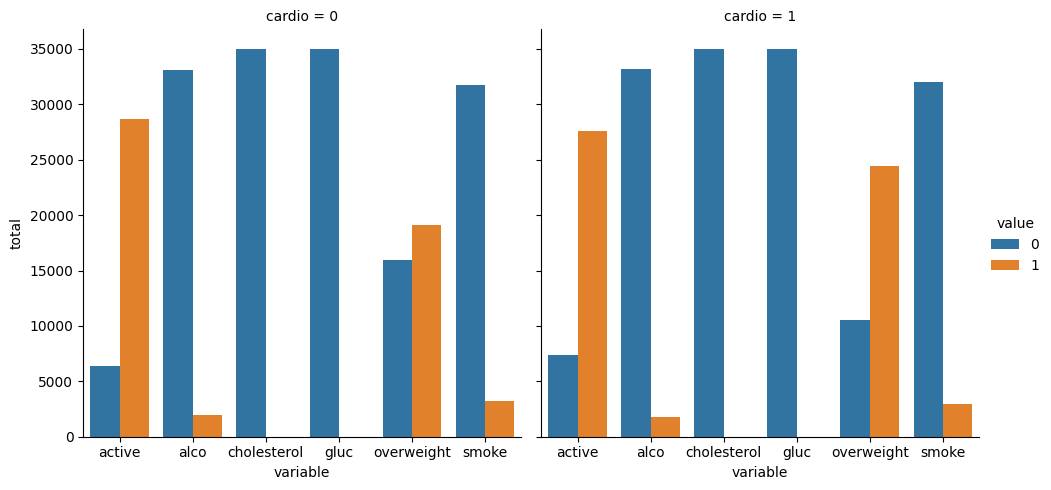

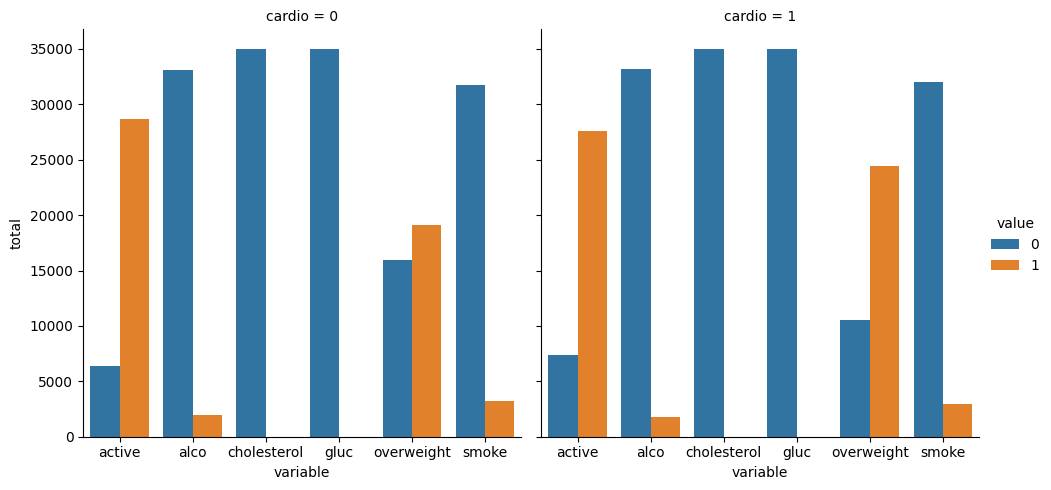

In [17]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke',
    # 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename
    # one of the collumns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index()
    df_cat = df_cat.rename(columns={0: 'total'})

    # Draw the catplot with 'sns.catplot()'
    graph = sns.catplot(data=df_cat, kind="bar", x="variable", y="total", hue="value", col="cardio")
    fig = graph.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


draw_cat_plot()




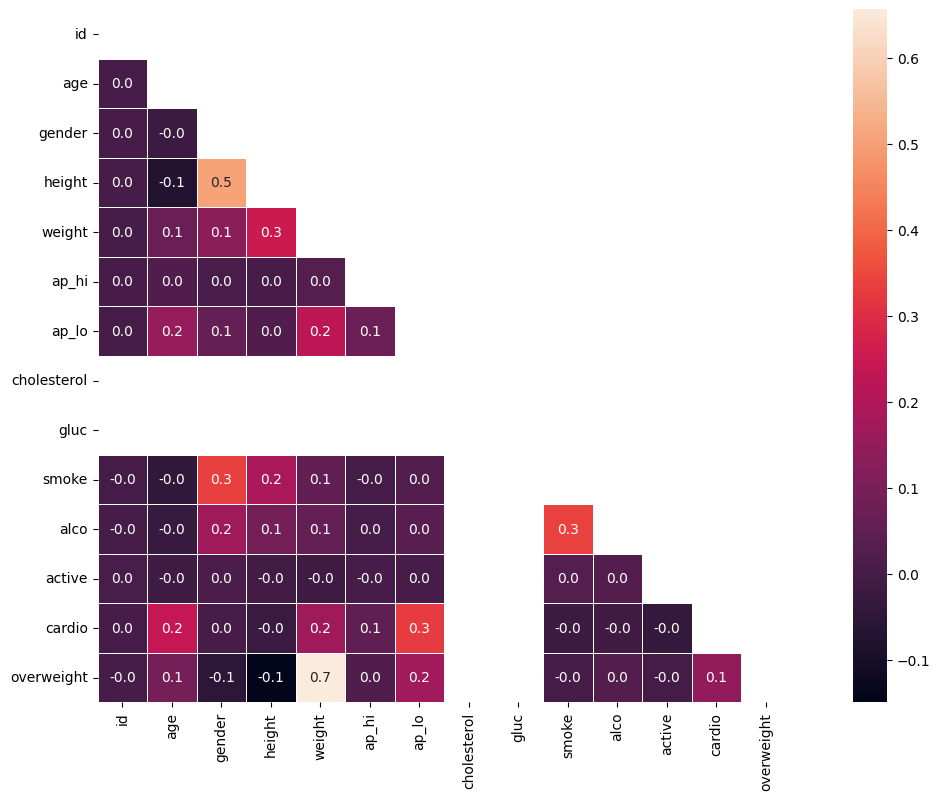

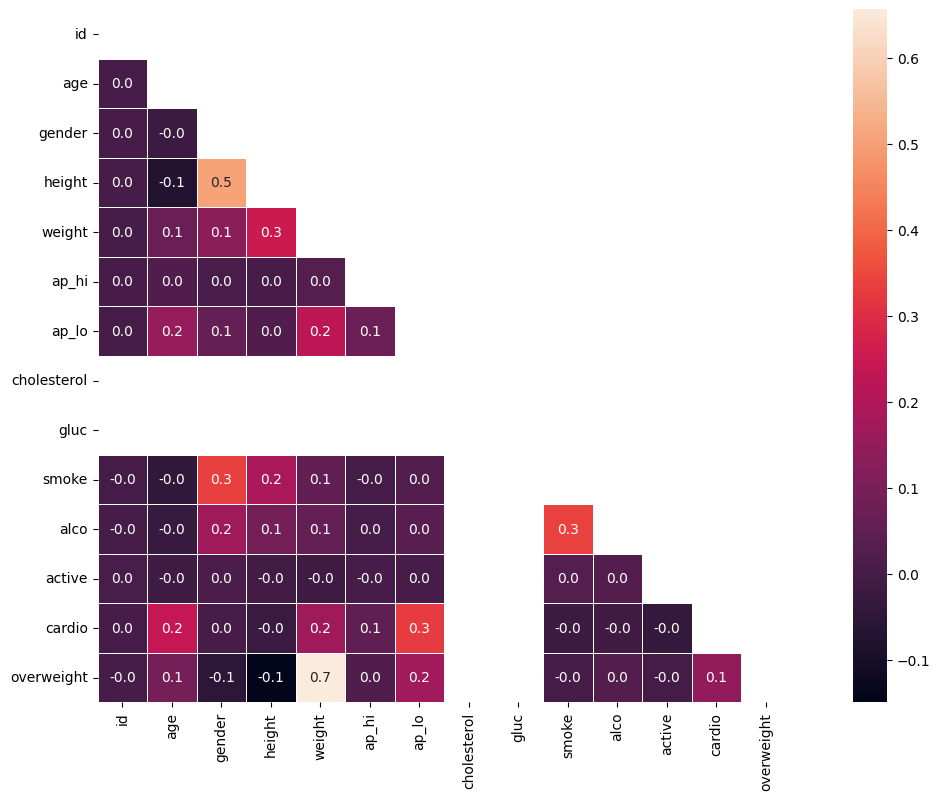

In [19]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))
                 ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(16, 9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

draw_heat_map()




In [ ]:
draw_cat_plot()
draw_heat_map()